# Nutritional facts for common foods EDA

In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
nutri_facts_common = pd.read_csv(r'..\data\raw\nutritional-facts-for-most-common-foods-and-products.csv')

In [82]:
nutri_facts_common['Category'].value_counts()

Category
Breads, cereals, fastfood,grains    43
Meat, Poultry                       29
Desserts, sweets                    29
Vegetables A-E                      28
Vegetables R-Z                      28
Fruits G-P                          28
Fruits A-F                          22
Dairy products                      21
Fish, Seafood                       19
Vegetables F-P                      14
Fats, Oils, Shortenings             12
Seeds and Nuts                      12
Drinks,Alcohol, Beverages           12
Soups                               10
Fruits R-Z                           8
Jams, Jellies                        8
Name: count, dtype: int64

In [83]:
nutri_facts_common['Category'] = nutri_facts_common['Category'].replace({
    'Vegetables A-E': 'Vegetables',
    'Vegetables F-P': 'Vegetables',
    'Vegetables R-Z': 'Vegetables',
    'Fruits A-F': 'Fruits',
    'Fruits G-P': 'Fruits',
    'Fruits R-Z': 'Fruits',
    'Breads, cereals, fastfood,grains': 'Breads, cereals, fastfood, grains'
})

In [84]:
nutri_facts_common['Category'].value_counts()

Category
Vegetables                           70
Fruits                               58
Breads, cereals, fastfood, grains    43
Meat, Poultry                        29
Desserts, sweets                     29
Dairy products                       21
Fish, Seafood                        19
Fats, Oils, Shortenings              12
Drinks,Alcohol, Beverages            12
Seeds and Nuts                       12
Soups                                10
Jams, Jellies                         8
Name: count, dtype: int64

In [85]:
nutri_facts_common.replace("t", 0, inplace=True)

In [86]:
nutri_facts_common.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,"Cows' milk, whole",1 qt.,976,660.0,32,40,36,0,48,Dairy products
1,"Cows milk, skim",1 qt.,984,360.0,36,0,0,0,52,Dairy products
2,Powdered milk,1 cup,103,515.0,27,28,24,0,39,Dairy products
3,Goats' milk,1 cup,244,165.0,8,10,8,0,11,Dairy products
4,Cocoa,1 cup,252,235.0,8,11,10,0,26,Dairy products


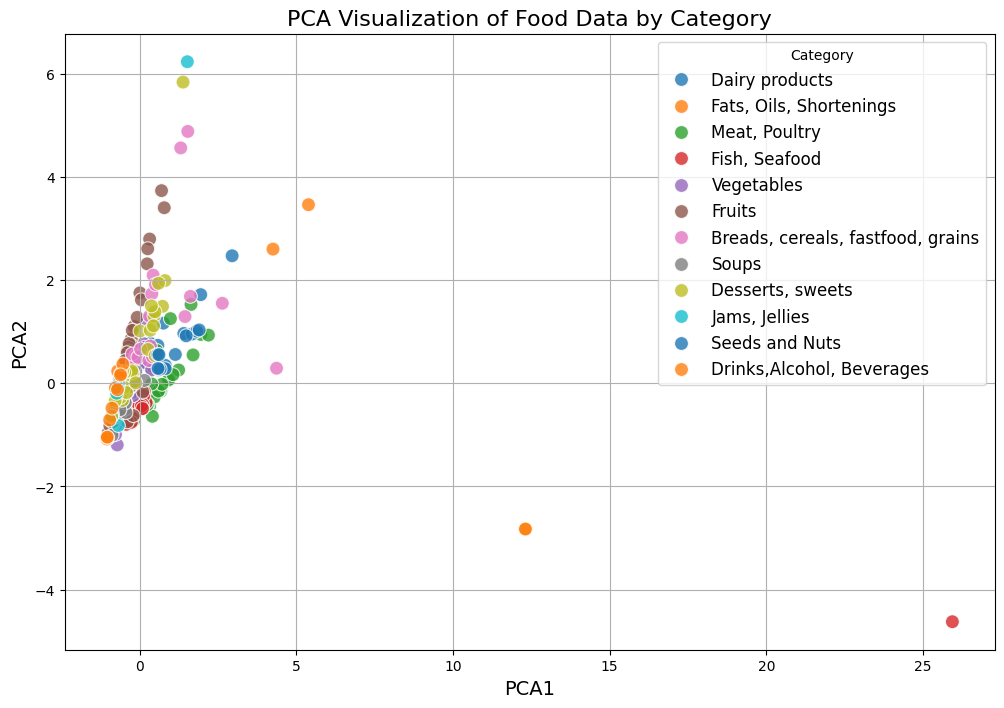

In [87]:
# Standardize numerical data
scaler = StandardScaler()
numeric_columns = ['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
nutri_facts_common[numeric_columns] = nutri_facts_common[numeric_columns].fillna(0)
nutri_facts_common[numeric_columns] = nutri_facts_common[numeric_columns].apply(pd.to_numeric)
scaled_data = scaler.fit_transform(nutri_facts_common[numeric_columns])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataframe
nutri_facts_common['PCA1'] = pca_result[:, 0]
nutri_facts_common['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Category', 
    data=nutri_facts_common, 
    palette='tab10', 
    s=100, 
    alpha=0.8
)

# Plot aesthetics
plt.title('PCA Visualization of Food Data by Category', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Category', fontsize=12)
plt.grid(True)
plt.show()

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(nutri_facts_common[numeric_columns])

# Extract feature vectors for specific foods
food_1 = normalized_features[nutri_facts_common['Food'] == "Cows' milk, whole"][0]
food_2 = normalized_features[nutri_facts_common['Food'] == "Lentils"][0]

# Compute cosine similarity
similarity = cosine_similarity([food_1], [food_2])[0][0]

print(f"Cosine similarity between 'Cows' milk, whole' and 'Lentils': {similarity:.4f}")


Cosine similarity between 'Cows' milk, whole' and 'Lentils': 0.1227
